# Minotour logs analysis

In [1]:
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from rasa_core.interpreter import RegexInterpreter,RasaNLUInterpreter
from rasa_core.agent import Agent
from rasa_nlu.model import Metadata, Interpreter, Trainer
from rasa_nlu.evaluate import run_evaluation
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
import matplotlib
#import warnings
import random
import time
#warnings.filterwarnings('ignore')
#matplotlib.use('Agg')

<div class="alert alert-info" role="alert">
    <b>Introduction:</b><br>
In this section we try to analyse the minotour logs from october to november.<br> This will allow us to have an idea of the intents that are misidentified by the bot to improve its intent classification and entities recognition as logs are a great source of data that can help improve an agent.
</div>

In [2]:
#import the logs
octLog=pd.read_csv("Minotour_logs/log_2018-10.csv")
septLog=pd.read_csv("Minotour_logs/log_2018-09.csv")
novLog=pd.read_csv("Minotour_logs/log_2018-11.csv")

In [3]:
#function to plot for each log the number of times an intent has been matched by a user message
def nb_intents_plot(log_pd, month):
    percent=log_pd["intent"].value_counts()/len(log_pd)
    percent.plot(kind='bar', figsize=(10,8))
    plt.ylabel("Percentage of messages matching an intent")
    plt.xlabel("Intents matched")
    plt.title("Percentage of intents matches for "+str(month)+"'s log")
    #plt.grid()
    plt.show()

#function 

In [8]:
#The logs colomns
octLog.columns

Index(['id', 'date', 'timestamp_q', 'platform', 'channel', 'user', 'intent',
       'confidence', 'lang', 'raw_message', 'clean_message', 'timestamp_a',
       'response', 'rating'],
      dtype='object')

In [163]:
octLog[['user','intent',
           'confidence', 'lang', 'raw_message', 'clean_message', 'timestamp_a',
           'response', 'rating']].head(40)

,user,intent,confidence,lang,raw_message,clean_message,timestamp_a,response,rating
0,c599d681-681e-69de-8562-7bf5b6ba24df,Default Welcome Intent,1.000000,NaN,"""Hi""","""Hi""",1538466604,"""Greetings! My name is MinoTour and I'm here t...",0
1,c599d681-681e-69de-8562-7bf5b6ba24df,Default Welcome Intent,1.000000,en,"""Hi""","""Hi""",1538467632,"""Greetings! My name is MinoTour and I'm here t...",0
2,c599d681-681e-69de-8562-7bf5b6ba24df,Default Welcome Intent,1.000000,en,"""hi""","""hi""",1538467641,"""Hello! My name is MinoTour and I'm here to ad...",0
3,c599d681-681e-69de-8562-7bf5b6ba24df,find.event,1.000000,en,"""events""","""events""",1538467647,"""What is the city?""",0
4,5c7737a9-eaae-f1fa-67e4-773954148e32,Default Welcome Intent,1.000000,NaN,"""Hi""","""Hi""",1538475690,"""Good day! Are you bored? My name is MinoTour ...",0
5,5c7737a9-eaae-f1fa-67e4-773954148e32,Default Fallback Intent,1.000000,en,"""i dont know""","""i dont know""",1538475717,"""Sorry could you say that again?""",0
6,5c7737a9-eaae-f1fa-67e4-773954148e32,Default Fallback Intent,1.000000,en,"""i don't know""","""i don't know""",1538475749,"""I didn't get that.""",0
7,5c7737a9-eaae-f1fa-67e4-773954148e32,Default Fallback Intent,1.000000,en,"""?""","""?""",1538475764,"""Sorry I didn't get that.""",0
8,daa4d247-9ea9-5a19-75ec-945272eff550,Default Welcome Intent,1.000000,NaN,"""Hi""","""Hi""",1538482006,"""Greetings! My name is MinoTour and I'm here t...",0
9,daa4d247-9ea9-5a19-75ec-945272eff550,find.poi,1.000000,en,"""trail""","""trail""",1538482018,"""What is the city?""",0


In [45]:
#function to select the intents not recognized --> Default Fallback Intent alongs with the log lengths and number of greetings msgs
def logInfos(log):
    intentsNotRecognized=log[log['intent']=="Default Fallback Intent"][['intent',
           'confidence', 'lang', 'raw_message', 'clean_message', 'timestamp_a',
           'response', 'rating']]
    nbGreetings=len(log[log['intent']=="Default Welcome Intent"])
    nbRecords=len(log)
    return nbGreetings, nbRecords, intentsNotRecognized

## October log

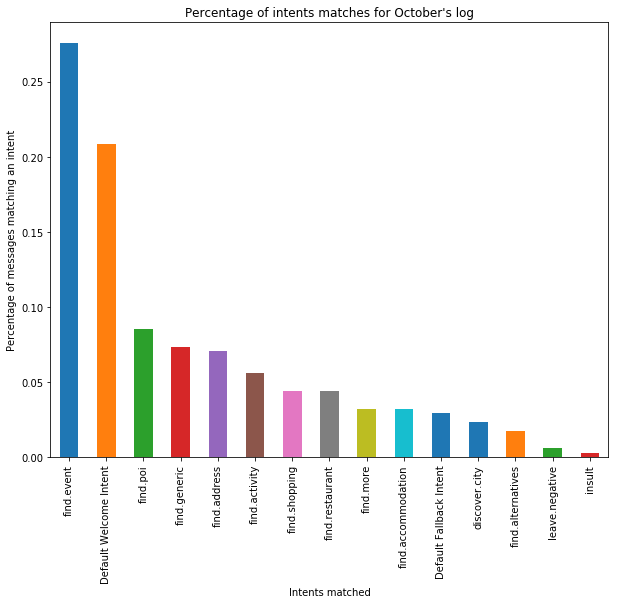

In [75]:
#nb of matches per intent
nb_intents_plot(octLog, "October")

In [40]:
#infos about september log
nbGreetings,nbRecords,intentsNotRecognized=logInfos(septLog)
print("There are ",nbGreetings,"greetings in this log out of",nbRecords, "records which is ",(nbGreetings/nbRecords)*100,"% of greetings")
intentsNotRecognized

There are  104 greetings in this log out of 1006 records which is  10.337972166998012 % of greetings


,intent,confidence,lang,raw_message,clean_message,timestamp_a,response,rating
329,Default Fallback Intent,1.0,en,"""do you speak french?""","""do you speak french?""",1536329373,"""Sorry what was that?""",0
333,Default Fallback Intent,1.0,en,"""where are you from""","""where are you from""",1536329744,"""I didn't get that.""",0
334,Default Fallback Intent,1.0,en,"""how are you doing?""","""how are you doing?""",1536329768,"""Sorry I didn't get that.""",0
335,Default Fallback Intent,1.0,en,"""what time is it?""","""what time is it?""",1536329785,"""Sorry I didn't get that.""",0
336,Default Fallback Intent,1.0,en,"""what are the available cities?""","""what are the available cities?""",1536329805,"""Sorry what was that?""",0
337,Default Fallback Intent,1.0,en,"""French Riviera""","""French Riviera""",1536329829,"""Can you say that again?""",0
345,Default Fallback Intent,1.0,en,"""weather paris""","""weather paris""",1536330127,"""Sorry what was that?""",0
362,Default Fallback Intent,1.0,en,"""can i ask you a question""","""can i ask you a question""",1536330685,"""One more time?""",0
368,Default Fallback Intent,1.0,en,"""culturelle""","""culturelle""",1536330838,"""Can you say that again?""",0
387,Default Fallback Intent,1.0,en,"""rent a car""","""rent a car""",1536331242,"""Say that again?""",0


## September log

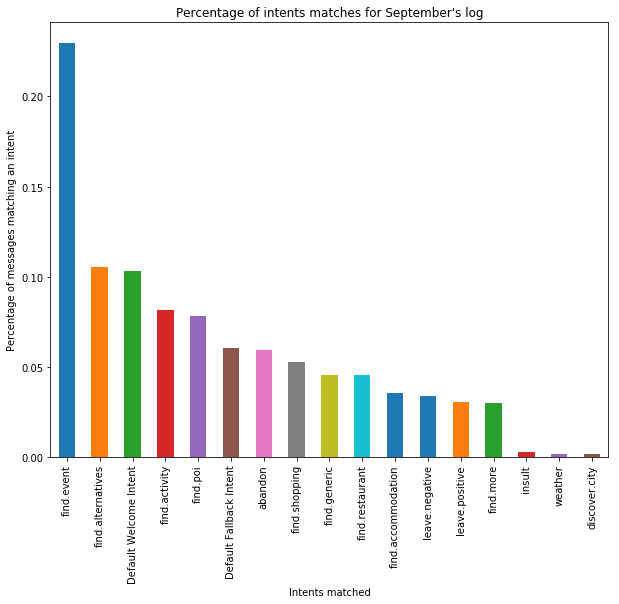

In [76]:
#nb of matches per intent
nb_intents_plot(septLog, "September")

In [41]:
#infos about october log
nbGreetings,nbRecords,intentsNotRecognized=logInfos(octLog)
print("There are ",nbGreetings,"greetings in this log out of",nbRecords, "records which is ",(nbGreetings/nbRecords)*100,"% of greetings")
intentsNotRecognized

There are  71 greetings in this log out of 341 records which is  20.821114369501466 % of greetings


,intent,confidence,lang,raw_message,clean_message,timestamp_a,response,rating
5,Default Fallback Intent,1.0,en,"""i dont know""","""i dont know""",1538475717,"""Sorry could you say that again?""",0
6,Default Fallback Intent,1.0,en,"""i don't know""","""i don't know""",1538475749,"""I didn't get that.""",0
7,Default Fallback Intent,1.0,en,"""?""","""?""",1538475764,"""Sorry I didn't get that.""",0
27,Default Fallback Intent,1.0,en,"""what are the category""","""what are the category""",1538646030,"""I missed that.""",0
70,Default Fallback Intent,1.0,en,"""help me""","""help me""",1539004070,"""One more time?""",0
96,Default Fallback Intent,1.0,en,"""check for attractions""","""check for attractions""",1539070186,"""Sorry I didn't get that.""",0
101,Default Fallback Intent,1.0,fr,"""where is 245 Route des Lucioles Valbonne""","""where is 245 Route des Lucioles Valbonne""",1539159897,"""J'ai du mal à comprendre cette question.""",0
122,Default Fallback Intent,1.0,en,"""what is your name""","""what is your name""",1539271648,"""What was that?""",0
193,Default Fallback Intent,1.0,en,"""what to check in NICE""","""what to check in NICE""",1539352460,"""Can you say that again?""",0
219,Default Fallback Intent,1.0,en,"""today""","""today""",1539680155,"""Sorry what was that?""",0


<div class="alert alert-info" role="alert">
    <b>Comment:</b><br>
    Some people ask questions about Minotour himself: "What's your name ?, "Where are you from ?". Although in the Welcome text Minotour says: "Hello! My name is Minotour and I'm here to advice you on events, activities, places, accommodation, shopping or food on the French Riviera!" he doesn't know his name.
 Add an intent to address it??
    </div>

## November log

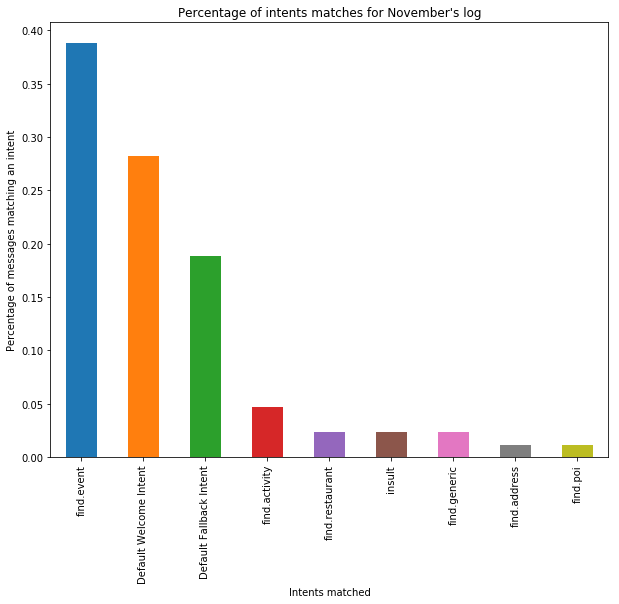

In [77]:
#nb of matches per intent
nb_intents_plot(novLog, "November")

<div class="alert alert-info" role="alert">
    <b>Comment:</b><br>
As we can see from the three histograms, the intent that has been matched the most is the <b>find.event one</b>. <br>
    This means that people are usually looking for events when they chat with minotour or maybe that a lot of intents are misclassied and end up being identified as find.event by the bot. However, by looking at the messages, we can see that it's more probably the first reason. Also, the second intent that comes after is the <b>Default Welcome Intent</b>. This is quite normal since each conversation usually starts by greetings.
    <br>Regarding, the other intents, it depends highly of the month but are either find.activity, find.poi etc.
</div>

In [43]:
#infos about november log
nbGreetings,nbRecords,intentsNotRecognized=logInfos(novLog)
print("There are ",nbGreetings,"greetings in this log out of",nbRecords, "records which is ",(nbGreetings/nbRecords)*100,"% of greetings")
intentsNotRecognized

There are  24 greetings in this log out of 85 records which is  28.235294117647058 % of greetings


,intent,confidence,lang,raw_message,clean_message,timestamp_a,response,rating
2,Default Fallback Intent,1.0,en,"""hallo""","""hallo""",1541587783,"""Sorry I didn't get that.""",0
5,Default Fallback Intent,1.0,en,"""السلام عليكم""","""السلام عليكم""",1541587805,"""Sorry what was that?""",0
6,Default Fallback Intent,1.0,en,"""من أنت ؟؟""","""من أنت ؟؟""",1541587808,"""I missed that.""",0
7,Default Fallback Intent,1.0,en,"""a greeting ""","""a greeting """,1541587813,"""I didn't get that. Can you say it again?""",0
8,Default Fallback Intent,1.0,en,"""shallom""","""shallom""",1541593030,"""What was that?""",0
9,Default Fallback Intent,1.0,en,"""hallo""","""hallo""",1541593042,"""I didn't get that. Can you say it again?""",0
11,Default Fallback Intent,1.0,en,"""salut""","""salut""",1541593052,"""Sorry can you say that again?""",0
19,Default Fallback Intent,1.0,en,"""salut""","""salut""",1541593549,"""I missed that.""",0
23,Default Fallback Intent,1.0,en,"""bjr""","""bjr""",1541593584,"""Sorry can you say that again?""",0
25,Default Fallback Intent,1.0,en,"""bondoir""","""bondoir""",1541593594,"""Can you say that again?""",0


In [ ]:
# Skipgram model
model = fasttext.skipgram('data.txt', 'model')
print (model.words) # list of words in dictionary

# CBOW model
model = fasttext.cbow('data.txt', 'model')
print (model.words) # list of words in dictionary

# Comparison between rasa and dialogflow

<div class="alert alert-info" role="alert">
Here we try to compare rasa and dialogflow.<br>To do so, we took the log of october (there is no particukar reason for this except that it was the most recent and complete one since we were still in november) and extracted the different messages sent by users. We then feed them to rasa nlu, a model that we trained with the spacy pipeline with 547 examples.
    We then decided decided to compare the confidences of both rasa and dialogflow agents.<br>
    
</div>

In [25]:
# loading the interpreter 
interpreter = Interpreter.load('rasa_minotour/models/current/model_spacy_547_examples')

# define function to ask question
def ask_question(text):
    return interpreter.parse(text)

def extract_relevant_info(output):
    d={"intent": output["intent"]["name"], "confidence": output["intent"]["confidence"], "raw_message": output["text"]}
    return d

def add_result_to_log(dataframe, d):
    
    return pd.concat([dataframe, pd.DataFrame.from_dict(d, orient='index').T],ignore_index=True)

In [26]:
from time import sleep
conversations_log=octLog["raw_message"]

def rasa_minotour_log(message_list):
    first_msg=ask_question(message_list[0])
    first_dict=extract_relevant_info(ask_question(message_list[0]))
    dataframe_log=pd.DataFrame.from_dict(first_dict, orient='index').T
    for msg in message_list[1:]:
        ans=ask_question(msg)
        #sleep(3)
        d=extract_relevant_info(ans)
        dataframe_log=add_result_to_log(dataframe_log, d)

    return dataframe_log

In [27]:
rasa_minotour_log=rasa_minotour_log(conversations_log)

In [13]:
df_all = pd.concat([rasa_minotour_log, octLog[rasa_minotour_log.columns]], 
                   axis='columns', keys=['rasa_minotour_log', 'dialogflow_minotour_log'])
df_all

rasa_minotour_log             \
                     intent confidence   
0    Default Welcome Intent   0.306281   
1    Default Welcome Intent   0.306281   
2    Default Welcome Intent   0.306281   
3             find.activity    0.24333   
4    Default Welcome Intent   0.306281   
5             find.activity   0.218863   
6                 find.more   0.380957   
7         find.alternatives   0.209631   
8    Default Welcome Intent   0.306281   
9    Default Welcome Intent   0.118517   
10   Default Welcome Intent   0.164076   
11   Default Welcome Intent   0.306281   
12               find.event   0.404199   
13               find.event   0.450803   
14            find.activity    0.14746   
15                   insult   0.559646   
16   Default Welcome Intent   0.306281   
17            find.activity   0.302134   
18               find.event   0.426903   
19                   insult   0.313986   
20   Default Welcome Intent   0.306281   
21   Default Welcome Intent   0.306281   
22                find.more   0.281933   
23            find.activity   0.324753   
24   Default Welcome Intent   0.306281   
25            find.activity   0.499322   
26   Default Welcome Intent   0.306281   
27                find.more   0.506016   
28               find.event   0.230944   
29   Default Welcome Intent   0.306281   
..                      ...        ...   
311           find.activity   0.457958   
312  Default Welcome Intent   0.306281   
313           find.activity   0.493865   
314               find.more   0.165932   
315               find.more    0.19142   
316              find.event    0.72777   
317               find.more   0.165932   
318              find.event   0.226896   
319           find.activity    0.35009   
320  Default Welcome Intent   0.306281   
321           find.activity   0.262106   
322              find.event   0.186275   
323           find.activity   0.262106   
324              find.event   0.199206   
325  Default Welcome Intent   0.306281   
326           find.activity    0.34503   
327           find.activity   0.384249   
328           find.activity   0.335131   
329           find.activity   0.322241   
330               find.more   0.318768   
331               find.more   0.270812   
332           find.activity   0.230879   
333               find.more   0.270812   
334           find.activity   0.230879   
335               find.more   0.165932   
336  Default Welcome Intent   0.306281   
337  Default Welcome Intent   0.306281   
338  Default Welcome Intent   0.306281   
339           find.activity   0.269197   
340              find.event   0.426903   

                                                      dialogflow_minotour_log  \
                                         raw_message                   intent   
0                                               "Hi"   Default Welcome Intent   
1                                               "Hi"   Default Welcome Intent   
2                                               "hi"   Default Welcome Intent   
3                                           "events"               find.event   
4                                               "Hi"   Default Welcome Intent   
5                                      "i dont know"  Default Fallback Intent   
6                                     "i don't know"  Default Fallback Intent   
7                                                "?"  Default Fallback Intent   
8                                               "Hi"   Default Welcome Intent   
9                                            "trail"                 find.poi   
10                                    "hiking trail"                 find.poi   
11                                              "Hi"   Default Welcome Intent   
12                            "events today in nice"               find.event   
13                      "events in antibes tomorrow"               find.event   
14                 "where to dive in french riviera"            fin

<div class="alert alert-info" role="alert">
    As we can see, unlike rasa, dialogflow has a confidence of 1 for almost every example. The model seems to overfit on the data it receives, maybe because those are very close to data that are already in the training data.
Comparing the confidence of both models is not really an optimal solution for two main reasons:
    <ul>
        <li>Dialogflow has a context that helps to understand and make a link if any between two consecutive messages while Rasa nlu doesn't support that. Indeed, we need the rasa core part and another component to handle that in Rasa;
        <li>According to <a href="https://rasa.com/docs/nlu/fallback/">rasa documentation</a>, the confidence is not a true probability that the prediction is correct, it’s just a metric defined by the model that approximately describes how similar your input was to the training data. Therefore, this cannot be used to compare the models.
    </ul>
    This is the reason why we decided, not to compare both but instead try to build a rasa nlu model that achieves the best accuracy possible. To do so, we will use the rasa nlu evaluate function below.
</div>

# RASA NLU Training

## Training data and testing data analysis

<div class="alert alert-info" role="alert">
    <b>Introduction:</b><br>
    In this section, we will try to analyse the training data that we have by ploting the distribution of examples per intent.<br>
    This will be used to split the data into a training and test set (with a ratio 0.8 and 0.2 of the initial data set). The training data will be used to train a Rasa NLU model for a tourism chatbot and the test set will serve to see how accurate is the model.

</div>

In [2]:
#function to plot for each intent the number of examples 
def examplesDist_plot(log_pd):
    percent=pd.DataFrame.from_records(log_pd["rasa_nlu_data"]["common_examples"])["intent"].value_counts()
    percent.plot(kind='bar', figsize=(10,8))
    plt.ylabel("Number of examples per intent")
    plt.xlabel("Intents")
    plt.title("Number of examples per intent")
    #plt.grid()
    plt.show()

In [54]:
#retrieving the initial training data of minotour as a pd
initial_data=pd.read_json("rasa_minotour/data/initial_data.json")

In [56]:
#columns that compose the training data
initial_data['rasa_nlu_data']

common_examples    [{'text': 'welcome', 'intent': 'Default Welcom...
entity_synonyms    [{'value': 'http://data.linkedevents.org/kos/3...
lookup_tables                                                     []
regex_features                                                    []
Name: rasa_nlu_data, dtype: object

<div class="alert alert-info" role="alert">
    <b>Comment:</b><br>
This initial data are the training data used to train minotour on dialogflow. It contains <b>3411 examples</b> for  <b>17 distinct intents</b> and <b>7 distinct entities</b>.<br>
    The examples are contain in the <b>common_examples</b> columns.
</div>

In [61]:
#Dataframe of examples 
examples_df=pd.DataFrame.from_records(initial_data["rasa_nlu_data"]["common_examples"])
#Distribution of examples in percentage
examples_dist=examples_df["intent"].value_counts()/len(examples_df)

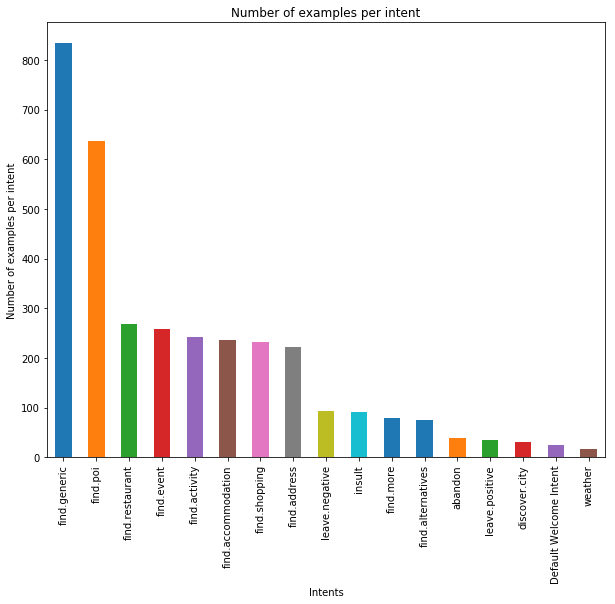

In [88]:
#nb of examples per intent in the initial data
examplesDist_plot(initial_data)

In [126]:
"""
Function to sample the training and test examples from the list of examples
initial_data is a dataframe composed of the list of all examples we want to sample from 
nb_of_examples is the number of examples we want for both training and testing
"""
def select_examples(initial_data, nb_of_examples):
    #if too much examples asked take all the examples and devided them in 20% 80% 
    if nb_of_examples>len(initial_data["rasa_nlu_data"]["common_examples"]):
            nb_of_examples=len(initial_data["rasa_nlu_data"]["common_examples"])
    #list of examples for training data
    training_examples_list=[]
    #list of examples for test data
    test_examples_list=[]
    #copy the examples dataframe to remove select directly the rows to keep for training and test
    training_df=initial_data.copy()
    test_df=initial_data.copy()
    #Dataframe of examples 
    examples_df=pd.DataFrame.from_records(initial_data["rasa_nlu_data"]["common_examples"])
    #a serie that contains for each intent the percentage of examples
    serie_distOfExamples=examples_df["intent"].value_counts()/len(examples_df)
    for intent in serie_distOfExamples.index.values:
        #n is the number of examples for intent to keep:for both training and testing
        n=int(serie_distOfExamples[intent]*nb_of_examples)
        #the list of indexes for "intent" in the dataframe
        l=examples_df[examples_df["intent"]==intent].index.values
        #select randomly n indexes in l
        examples_samp=random.sample(list(l),n)
        #80% of those examples are kept for training
        training_examples_ids=random.sample(examples_samp,int(n*0.8))
        #the rest is for testing
        for ex_id in training_examples_ids:
            examples_samp.remove(ex_id)
        for index_train in training_examples_ids:
            training_examples_list.append(initial_data["rasa_nlu_data"]["common_examples"][index_train])
        for index_test in examples_samp:
            test_examples_list.append(initial_data["rasa_nlu_data"]["common_examples"][index_test])
    #we replace for both training and testing df the corresponding intent rows by the one we selected
    training_df["rasa_nlu_data"]["common_examples"]=training_examples_list
    test_df["rasa_nlu_data"]["common_examples"]=test_examples_list

    return training_df, test_df
        

In [73]:
import json
#a function to reconstruct the json file for training and test examples from the output ouf the previous method
def construct_jsonExampleFile(training_df, test_df, initial_data):
    training_df.to_json('rasa_minotour/data/training_data.json')
    test_df.to_json('rasa_minotour/data/test_data.json')


In [135]:
#sample the "common_examples" and merge them with the other parts of the initial data to create the training sets
train,test=select_examples(initial_data,700)
construct_jsonExampleFile(train,test,initial_data)


In [4]:
""""
A function to train a rasa nlu model
"""
def trainModel(nb_examples,pipeline,model_dir):
    path_to_data="rasa_minotour/data/"+nb_examples+"_training_examples/training_data.json"
    training_data = load_data(path_to_data)
    pipeline = pipeline
    trainer = Trainer(RasaNLUModelConfig({"pipeline": pipeline}))
    interpreter = trainer.train(training_data)
    path_to_model="rasa_minotour/models/current/"+model_dir
    model_directory = trainer.persist(path_to_model)

In [5]:
"""
A function to evaluate a rasa nlu model
"""
def evaluateModel(pathToData,model_dir):
    path_to_data="rasa_minotour/data/"+pathToData+"/test_data.json"
    path_to_model="rasa_minotour/models/current/"+model_dir
    errors_path=path_to_model+"/evaluation/errors.json"
    confmat_path=path_to_model+"/evaluation/confmat"
    intent_hist_path=path_to_model+"/evaluation/hist"
    run_evaluation(path_to_data, path_to_model,errors_filename=errors_path,confmat_filename=confmat_path, intent_hist_filename=intent_hist_path)
    

<div class="alert alert-info" role="alert">
    <b>Comment:</b><br>
    In the following sections, we will be training and evaluating different models. Each of them is trained on different training examples of increasing size in order to see the effect of number of examples and also the chosen pipeline (tensorflow_embedding or spacy) over the training time. We have four different sizes of training data: 548, 1026, 1588, 2721 examples.<br>
    After, we evaluate the model using a test set that is approximately 20% of the initial data (80% training and 20% for tests as we usually do in machine learning). We show the confusion matrix and a histogram to represent the distribution of intent prediction confidence.
</div>

## Pipeline used : Tensorflow_embedding

### Training data: 548 examples -  test data: 145 examples

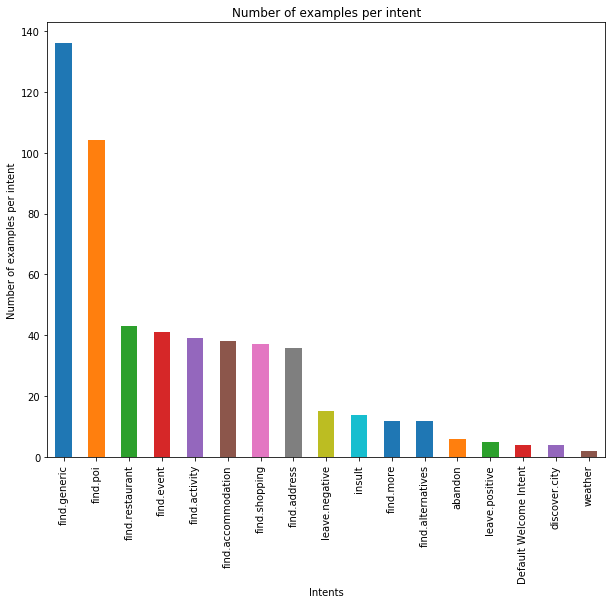

In [3]:
#nb of examples per intent in the training data
myTrainingData = pd.read_json("rasa_minotour/data/548_training_examples/training_data.json")
#plot distribution of examples
examplesDist_plot(myTrainingData)

In [6]:
#train the model
start=time.time()
trainModel("548","tensorflow_embedding","548_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/extractors/entity_synonyms.py:113: UserWarning: Found conflicting synonym definitions for 'salsa'. Overwriting target 'Music' with 'http://data.linkedevents.org/kos/3cixty/salsaclub'. Check your training data and remove conflicting synonym definitions to prevent this from happening.
  repr(replacement)))
Epochs: 100%|██████████| 300/300 [00:38<00:00,  7.78it/s, loss=0.026, acc=0.998]


The training took  1.0902632196744284  mins for execution


INFO:tensorflow:Restoring parameters from rasa_minotour/models/current/548_examples/intent_classifier_tensorflow_embedding.ckpt


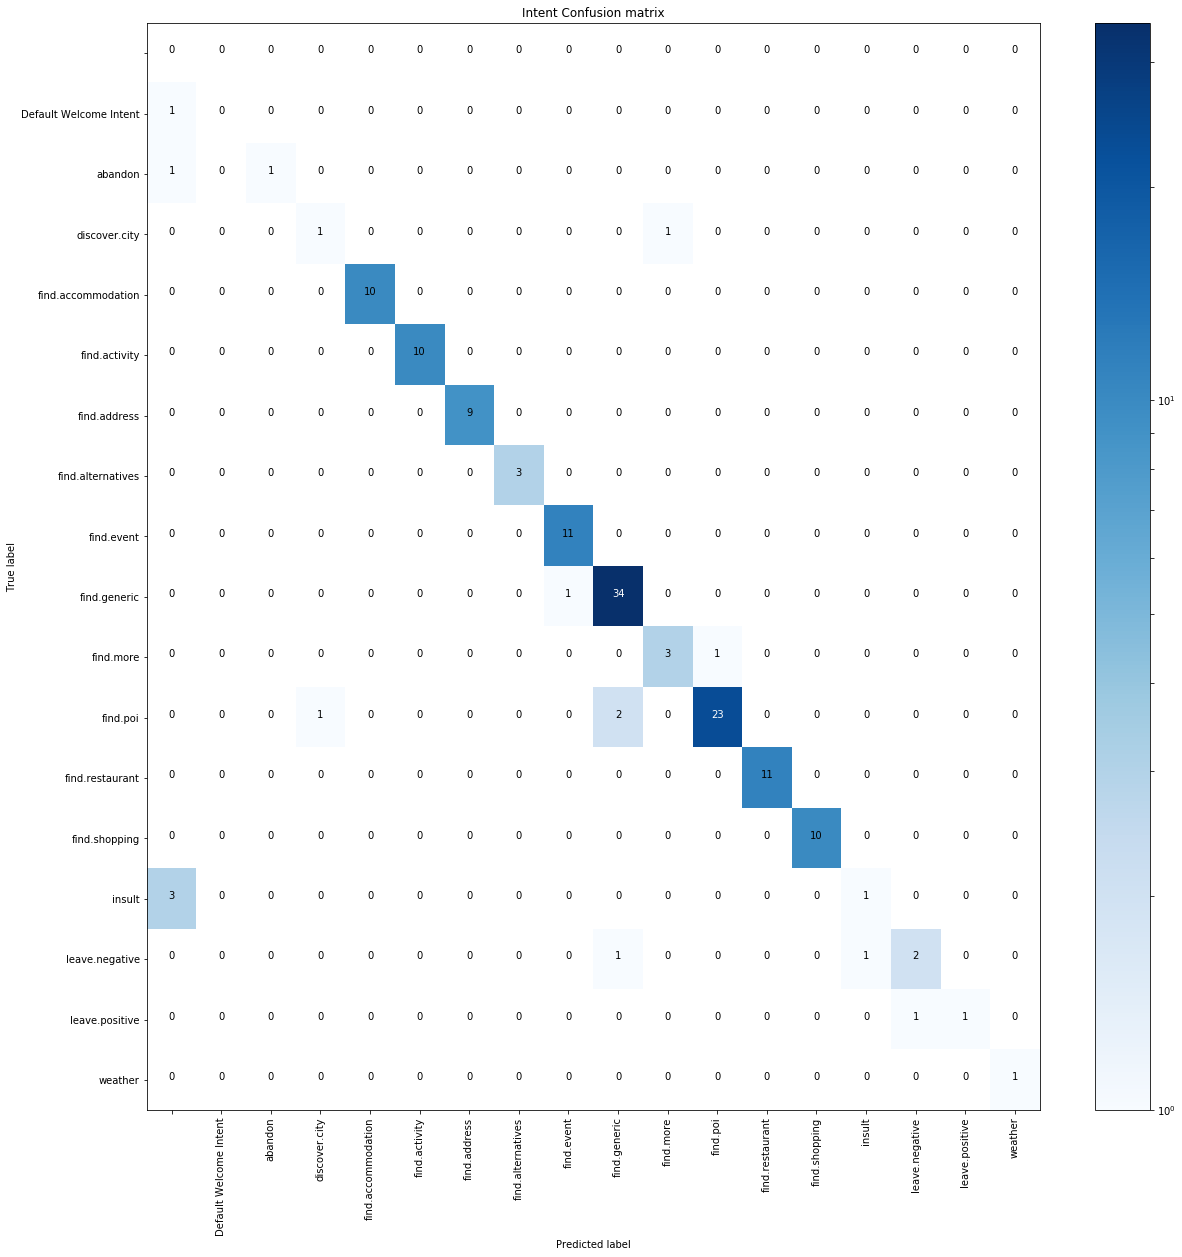

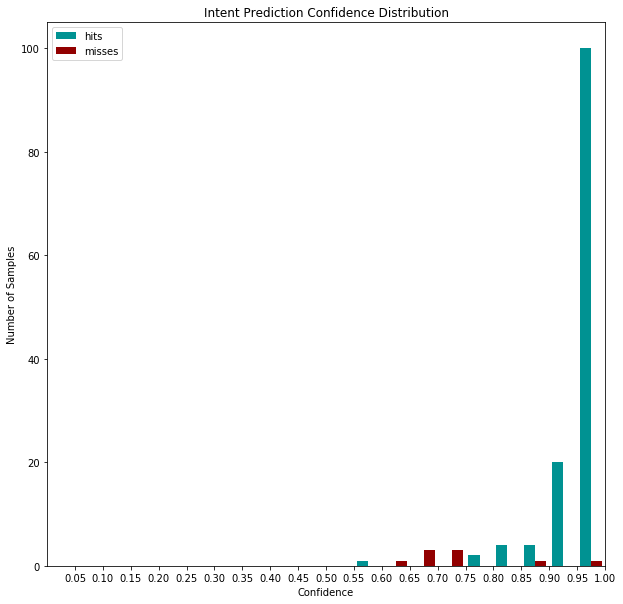

In [171]:
#evaluation of the model
evaluateModel("548_training_examples","548_examples")

### Training data: 1026 examples -  test data: 264 examples

In [14]:
#train the model
start=time.time()
trainModel("1026","tensorflow_embedding","1026_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

Epochs: 100%|██████████| 300/300 [01:22<00:00,  3.63it/s, loss=0.017, acc=0.999]


The training took  1.4573118964831033  mins for execution


INFO:tensorflow:Restoring parameters from rasa_minotour/models/current/1026_examples/intent_classifier_tensorflow_embedding.ckpt


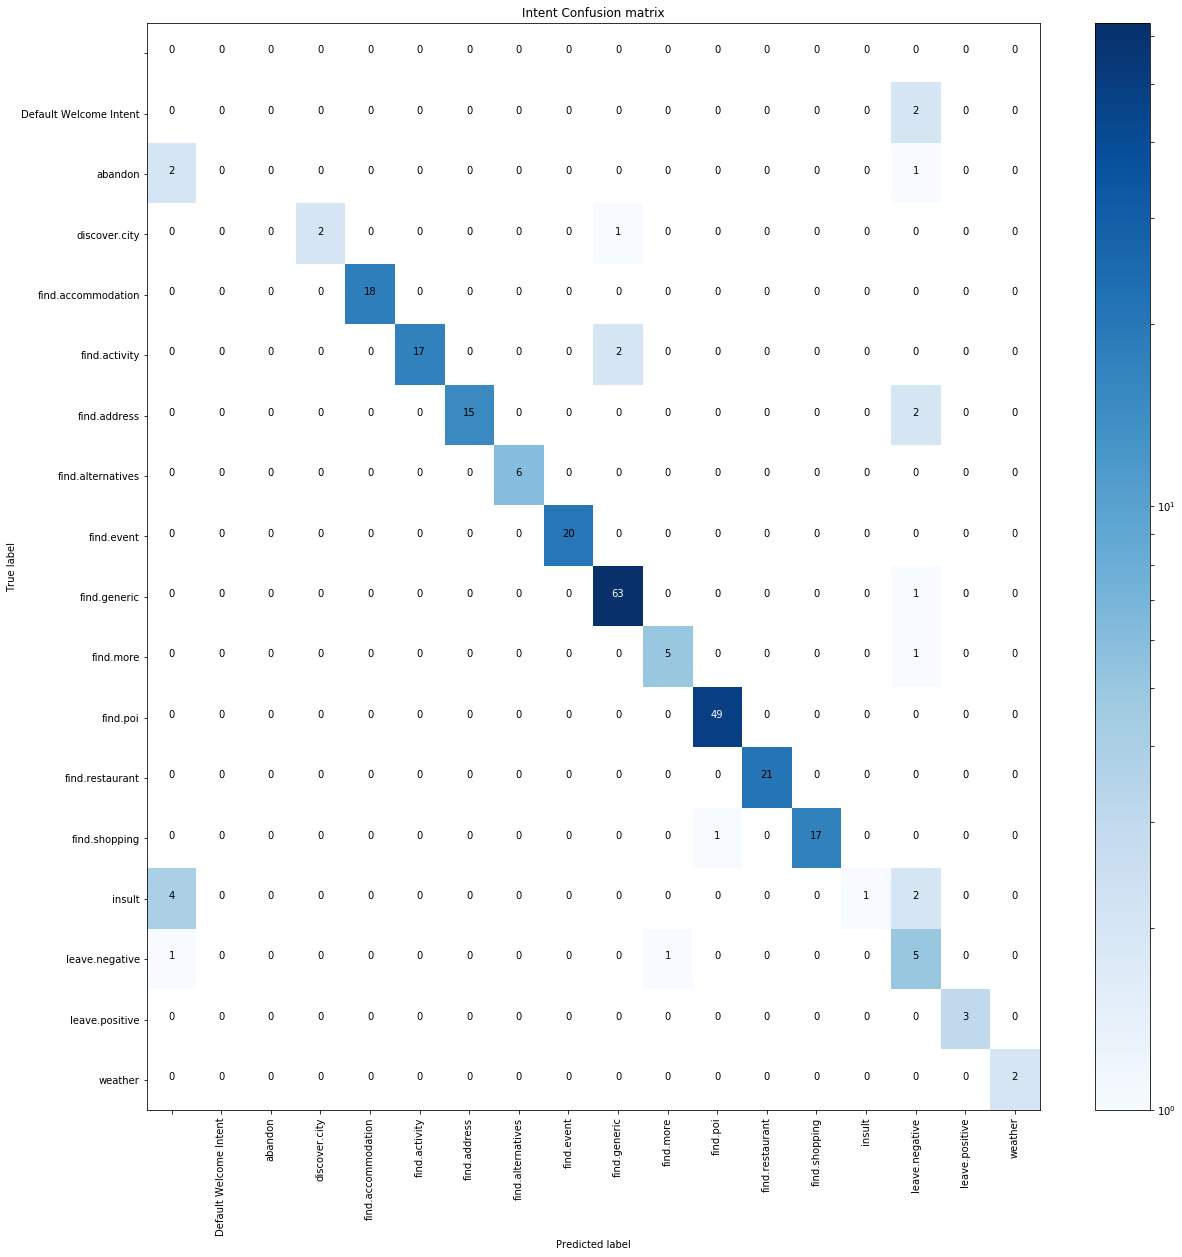

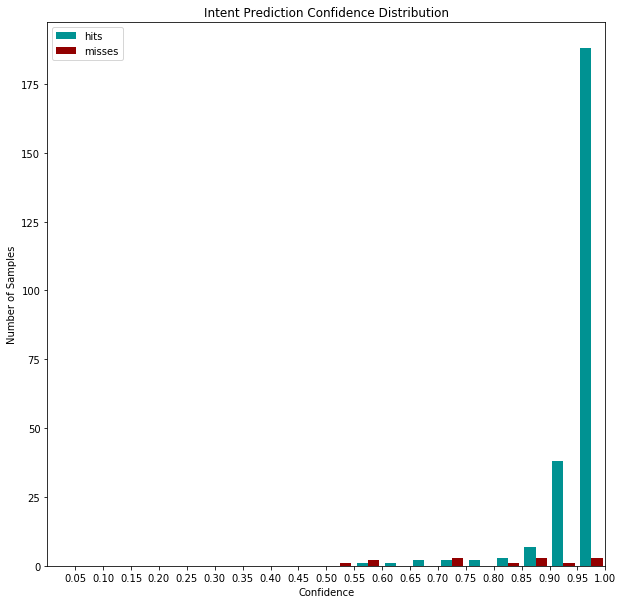

In [7]:
#evaluation of the model
evaluateModel("1026_training_examples","1026_examples")

### Training data: 1588 examples -  test data: 405 examples

In [8]:
#train the model
start=time.time()
trainModel("1588","tensorflow_embedding","1588_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/extractors/entity_synonyms.py:113: UserWarning: Found conflicting synonym definitions for 'salsa'. Overwriting target 'Music' with 'http://data.linkedevents.org/kos/3cixty/salsaclub'. Check your training data and remove conflicting synonym definitions to prevent this from happening.
  repr(replacement)))
Epochs: 100%|██████████| 300/300 [02:01<00:00,  2.46it/s, loss=0.013, acc=0.999]


The training took  2.4237243135770163  mins for execution


INFO:tensorflow:Restoring parameters from rasa_minotour/models/current/1588_examples/intent_classifier_tensorflow_embedding.ckpt


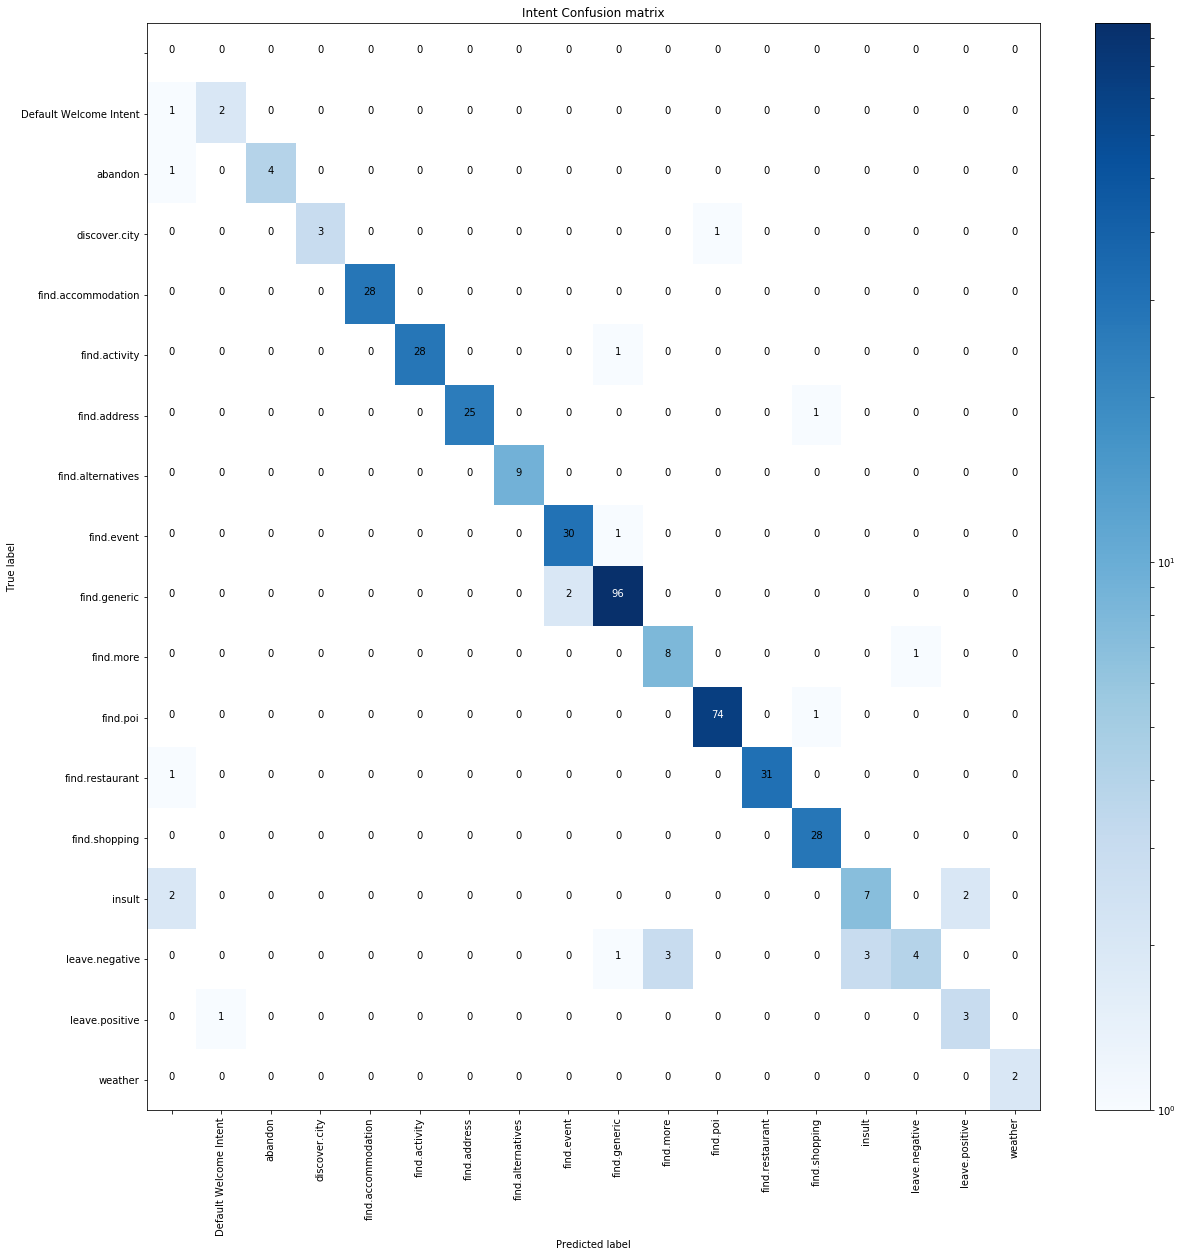

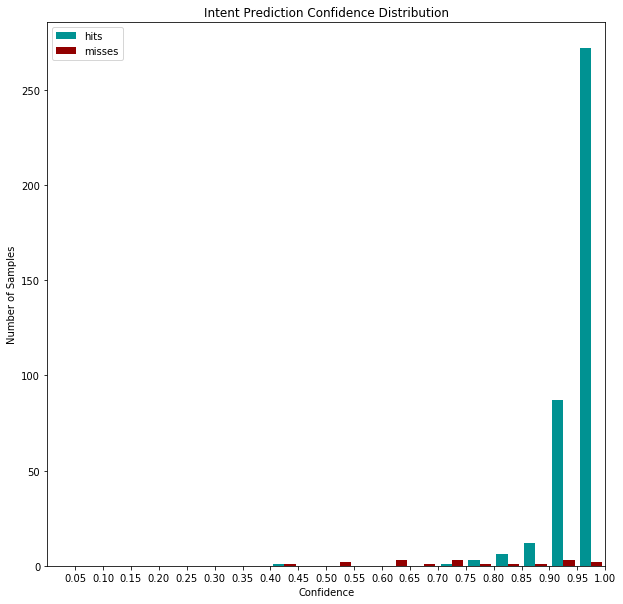

In [11]:
#evaluation of the model
evaluateModel("1588_training_examples","1588_examples")

### Training data: 2721 examples -  test data: 689 examples

In [13]:
#train the model
start=time.time()
trainModel("2721","tensorflow_embedding","2721_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

Epochs: 100%|██████████| 300/300 [04:23<00:00,  1.14it/s, loss=0.017, acc=0.998]


The training took  4.5721182783444725  mins for execution


INFO:tensorflow:Restoring parameters from rasa_minotour/models/current/2721_examples/intent_classifier_tensorflow_embedding.ckpt


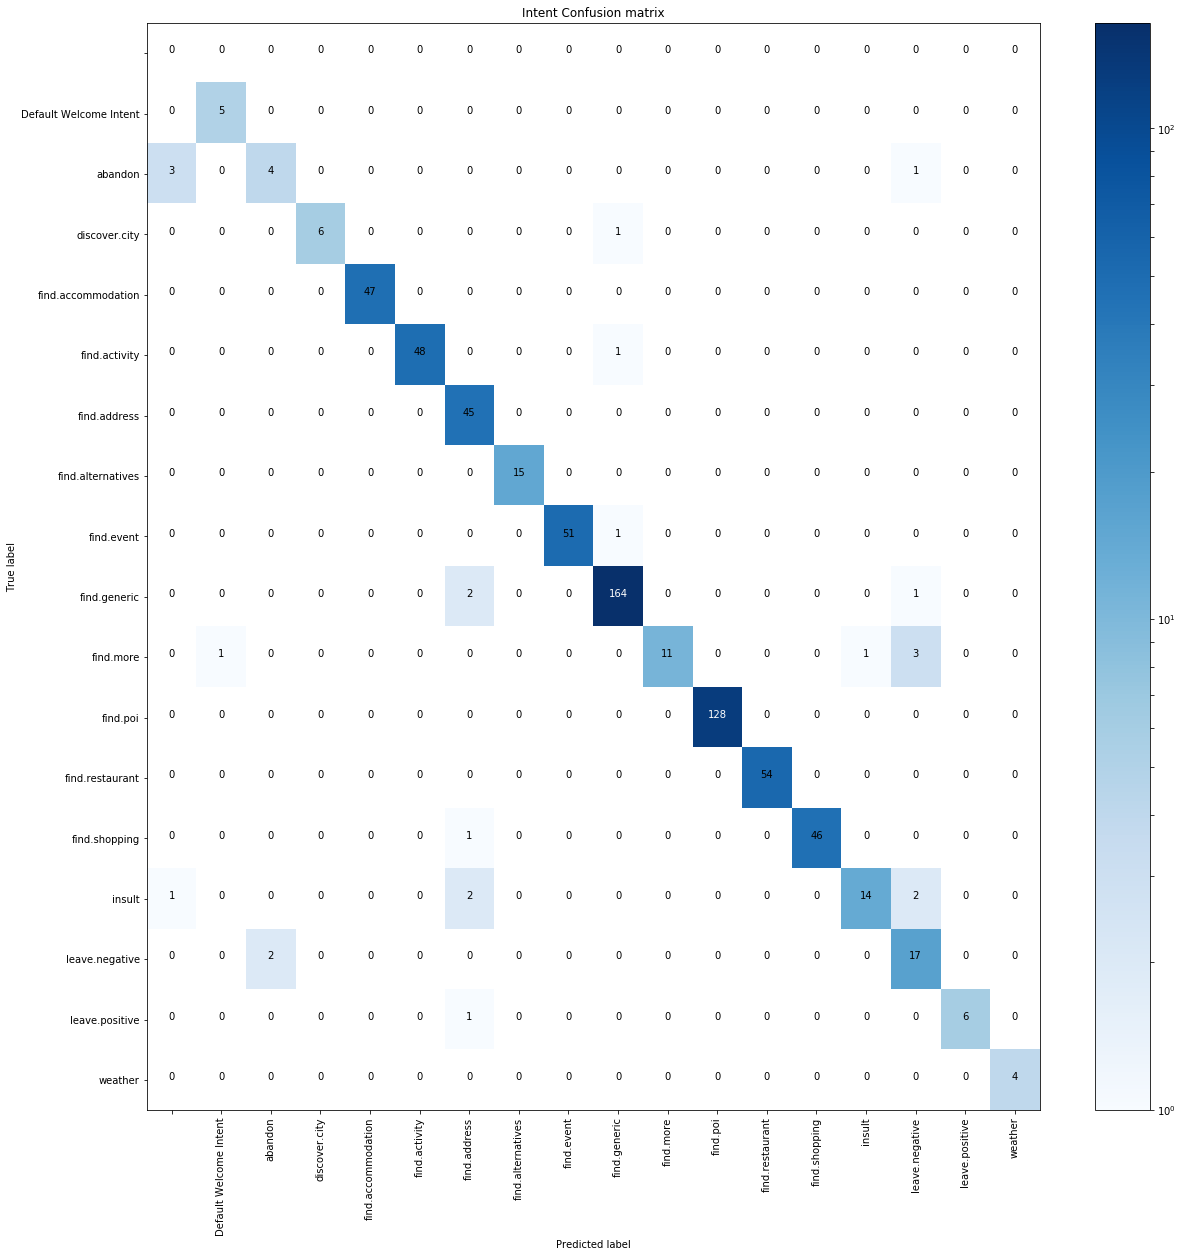

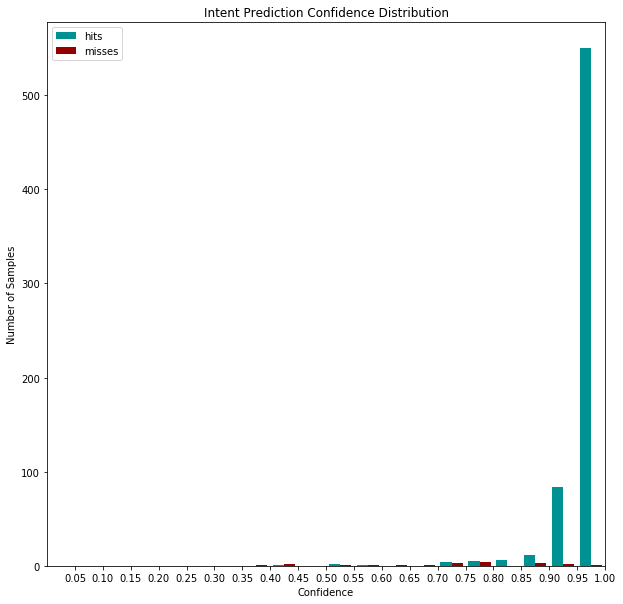

In [16]:
#evaluation of the model
evaluateModel("2721_training_examples","2721_examples")

### Summary

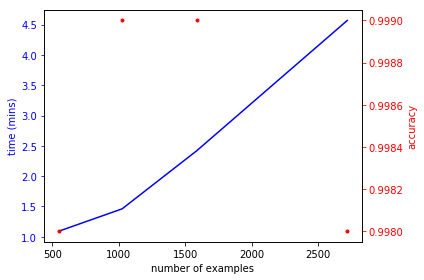

In [11]:
#plot accuracy and time vs nb of examples
fig, ax1 = plt.subplots()
time = [1.09, 1.46, 2.42, 4.57]
nb_examples=[548, 1026, 1588, 2721] 
ax1.plot(nb_examples, time, 'b-')
ax1.set_xlabel('number of examples')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('time (mins)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
accuracy = [0.998, 0.999, 0.999, 0.998]
ax2.plot(nb_examples, accuracy, 'r.')
ax2.set_ylabel('accuracy', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

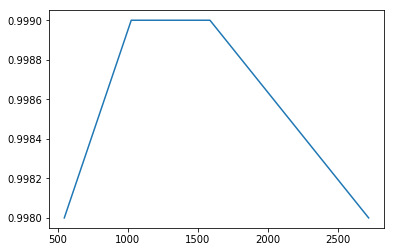

In [14]:
nb_examples=[548, 1026, 1588, 2721] 
accuracy = [0.998, 0.999, 0.999, 0.998]
plt.plot(nb_examples, accuracy)
plt.show()

## Pipeline used: spacy

### Training data: 548 examples -  test data: 145 examples

In [17]:
#train the model
start=time.time()
trainModel("548","spacy_sklearn","spacy_548_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/extractors/entity_synonyms.py:113: UserWarning: Found conflicting synonym definitions for 'salsa'. Overwriting target 'Music' with 'http://data.linkedevents.org/kos/3cixty/salsaclub'. Check your training data and remove conflicting synonym definitions to prevent this from happening.
  repr(replacement)))


Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packag

The training took  1.600995139280955  mins for execution


/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/training_data/training_data.py:191: UserWarning: Intent 'weather' has only 1 training examples! Minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_INTENT))
/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/training_data/training_data.py:191: UserWarning: Intent 'Default Welcome Intent' has only 1 training examples! Minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_INTENT))
/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/training_data/training_data.py:199: UserWarning: Entity 'accommodation' has only 1 training examples! minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_ENTITY))
/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/training_data/training_data.py:199: UserWarning: Entity 'weather' has only 1 training examples! minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_ENTITY))
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarni

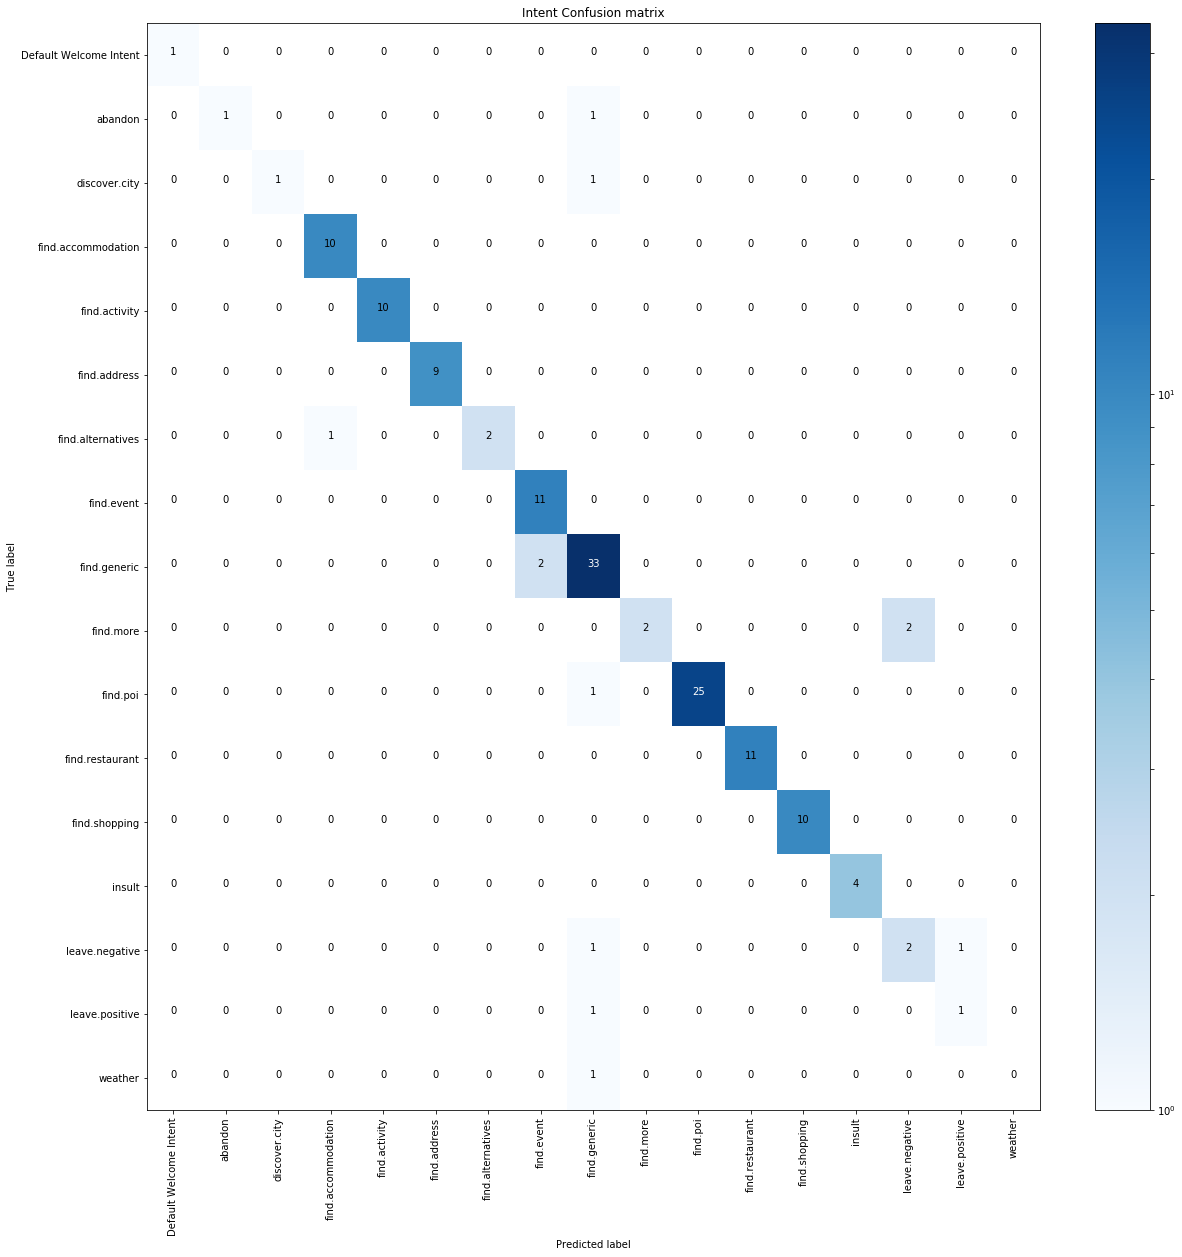

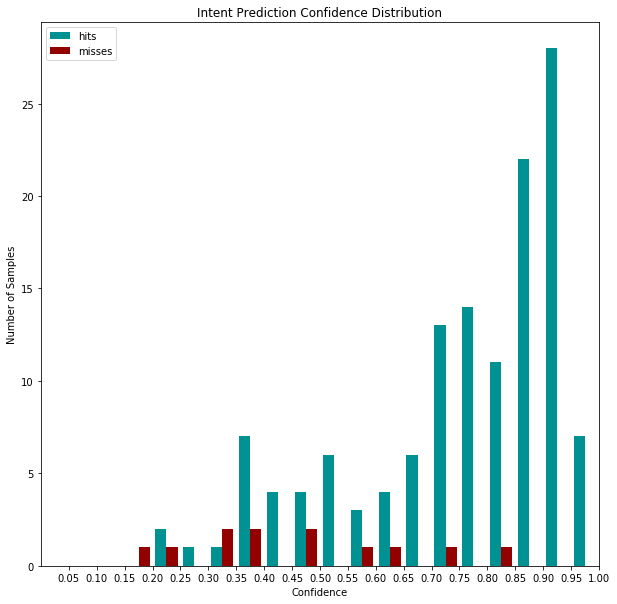

In [18]:
#evaluation of the model
evaluateModel("548_training_examples","spacy_548_examples")

### Training data: 1026 examples -  test data: 264 examples

In [ ]:
#train the model
start=time.time()
trainModel("1026","spacy_sklearn","spacy_1026_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

/home/lsome/.local/lib/python3.5/site-packages/rasa_nlu/extractors/entity_synonyms.py:113: UserWarning: Found conflicting synonym definitions for 'salsa'. Overwriting target 'Music' with 'http://data.linkedevents.org/kos/3cixty/salsaclub'. Check your training data and remove conflicting synonym definitions to prevent this from happening.
  repr(replacement)))


Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lsome/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#evaluation of the model
evaluateModel("1026_training_examples","spacy_1026_examples")

### Training data: 1588 examples -  test data: 405 examples

In [ ]:
#train the model
start=time.time()
trainModel("1588","spacy_sklearn","spacy_1588_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

In [ ]:
#evaluation of the model
evaluateModel("1588_training_examples","spacy_1588_examples")

### Training data: 2721 examples -  test data: 689 examples

In [ ]:
#train the model
start=time.time()
trainModel("2721","spacy_sklearn","spacy_2721_examples")
end=time.time()
print("The training took ", (end-start)/60, " mins for execution")

In [ ]:
#evaluation of the model
evaluateModel("2721_training_examples","spacy_2721_examples")

<div class="alert alert-info" role="alert">
    <b>Comment:</b><br>
As we can see from the above results, tensorflow_embedding performs way better than spacy_sklearn. <br>
  This can be explained by the fact that the <b>spacy_sklearn pipeline uses pre-trained word vectors</b> from either GloVe or fastText while the <b>tensorflow embedding pipeline doesn’t use any pre-trained word vectors, but instead fits these specifically for your dataset</b>.<br>
    Another problem is the scalability of Spacy. Indeed, with a few 1000 examples, the training is not able to finish and just hang. This seems to be due to the component <b>intent_classifier_sklearn</b> that uses <b>sklearn.svm.SVC</b>, a C-Support Vector Classification which has fit time complexity is more than quadratic with the number of samples.<br>
    See related content: https://github.com/RasaHQ/rasa_nlu/issues/340
    
</div>

# Check the examples distribution in training and test data

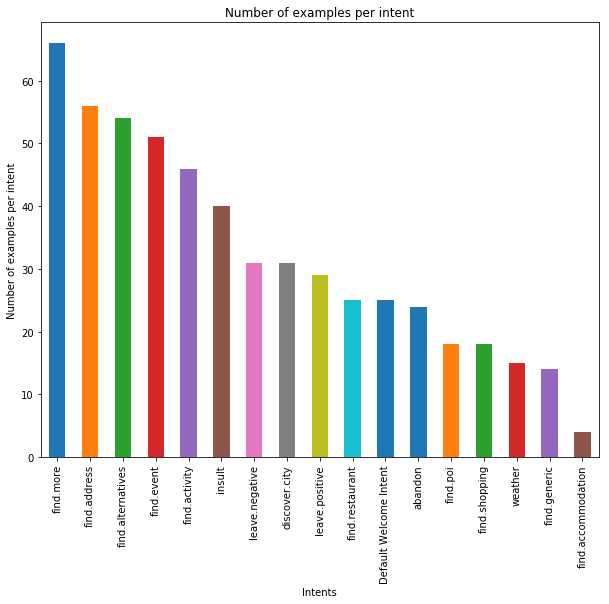

In [50]:
#nb of examples per intent in the training data
examplesDist_plot(training_data)